# THE FINAL PROJECT!!!!

## Step one: duplicate this notebook and set the sharing settings to COMMENT!

#### For part 1 of this project, we will analyze and plot data to tell the story of Covid-19 within the US, first at the level of states (California and New York), and then at the level of counties (your county!). You will find instructions for each part below.

##Name: Emory Adelman

Team members:Chelsea Johnson


## Loading modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
colors = sns.color_palette('colorblind')
colors


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Loading data

In [ ]:
# loading data (filled in for you!):

# From Our World in Data
world_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates=['date'])
us_vax = world_vax[world_vax['location']=='United States']
state_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv', parse_dates=['date'])

# From the LA Times
county_vax = pd.read_csv('https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-vaccination-county-totals.csv', parse_dates=['date'])

# From the New York Times
us_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', parse_dates=['date'])
state_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv', parse_dates=['date'])
county_data_2020 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2020.csv', parse_dates=["date"])
county_data_2021 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2021.csv', parse_dates=["date"])
county_data_2022 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2022.csv', parse_dates=["date"])
county_data_2023 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2023.csv', parse_dates=["date"])
county_data = pd.concat([county_data_2020, county_data_2021, county_data_2022, county_data_2023]) # making one big file for county data


##**Part 1**

## 1a) Plotting state data
*  Use `state_data.head(3)` to take a peek at the rolling average data for US states.
* Using this data, plot the number of deaths per 100 thousand people due to Covid-19 over time in New York and California. Plot both New York and California on the same plot, in different colors (see screenshots with plotting tips on the help page)
    * Before plotting each state, you will need to make a new dataframe that is the subset of the state data that only contains entries for that state (see filtering/subsetting tips on the help page)       
    * Include a legend     
    * Label the y-axis
    * Try to make your plot look nice!

In [ ]:
state_data['state']== 'California' #this is how you make a column called 'state'

0        False
1        False
2        False
3        False
4        False
         ...  
61937     True
61938    False
61939    False
61940    False
61941    False
Name: state, Length: 61942, dtype: bool

In [ ]:
#filtering to only see California state data, first three times it appears
cali_data = state_data[state_data['state'] == 'California']
cali_data.head(3)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
7,2020-01-25,USA-06,California,1,0.14,0.0,0,0.0,0.0
10,2020-01-26,USA-06,California,1,0.29,0.0,0,0.0,0.0
14,2020-01-27,USA-06,California,0,0.29,0.0,0,0.0,0.0


In [ ]:
#filtering to only see new york data
ny_data = state_data[state_data['state']== 'New York']
ny_data.head(3)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
246,2020-03-01,USA-36,New York,1,0.14,0.0,0,0.0,0.0
259,2020-03-02,USA-36,New York,0,0.14,0.0,0,0.0,0.0
275,2020-03-03,USA-36,New York,1,0.29,0.0,0,0.0,0.0


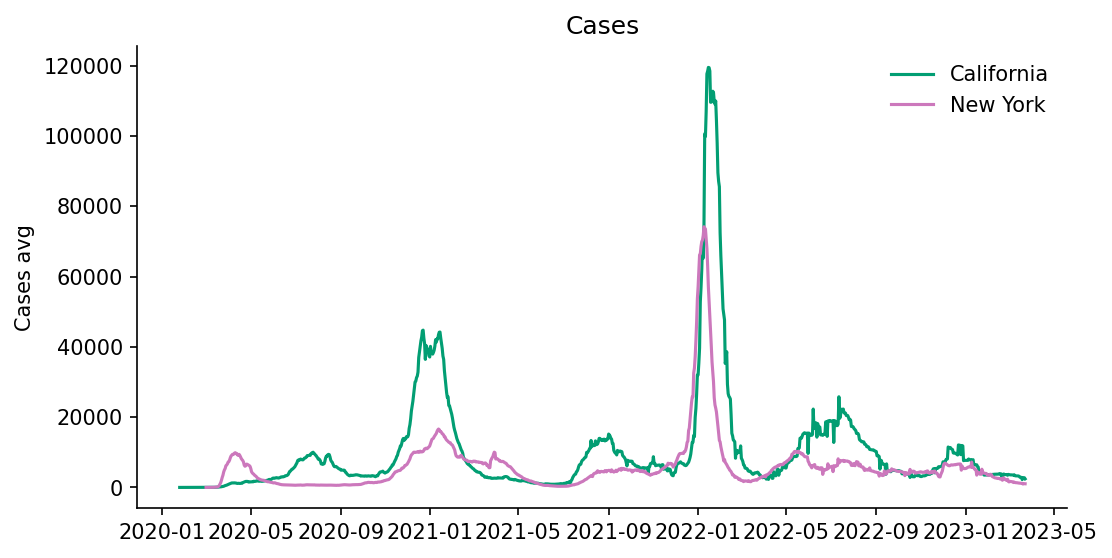

In [ ]:
#making a plot of cases average in California and New York States
fig, sub = plt.subplots(1, 1, figsize = (8, 4), dpi = 150, sharex = True)
plt.plot(cali_data['date'], cali_data['cases_avg'], color=colors[2], label='California')
plt.plot(ny_data['date'], ny_data['cases_avg'], color=colors[4],label='New York')
sub.set_ylabel('Cases avg')
sub.set_title('Cases')
sub.legend(frameon=False)
sns.despine()


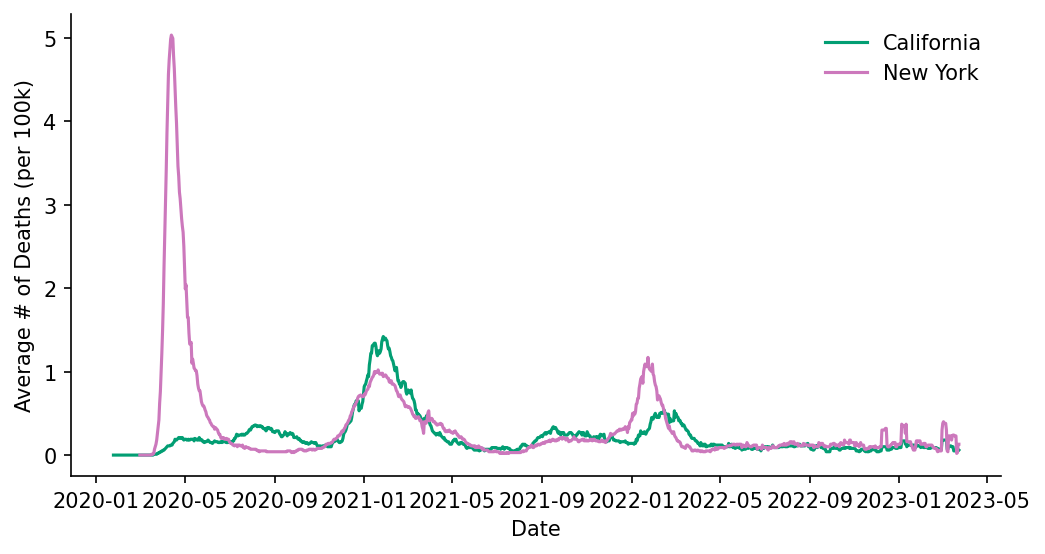

In [ ]:
fig,sub=plt.subplots(1,1,figsize=(8,4),dpi=150,sharex=True)
plt.plot(cali_data['date'],cali_data['deaths_avg_per_100k'],color=colors[2],label='California')
plt.plot(ny_data['date'],ny_data['deaths_avg_per_100k'],color=colors[4],label='New York')
sub.set_xlabel('Date')
sub.set_ylabel('Average # of Deaths (per 100k)')
sub.legend(frameon=False)
sns.despine()

## 1b) Measuring R at three time intervals in New York and California:
* March 14 - April 1st, 2020
* November 20th - December 20th, 2020
* February 1st - March 1st, 2021

1. Make a new column called `day_index` in the `state_data` dataframe for the day number (an integer) by subtracting the datetime for the start of 2020 and then using .dt.days on the result (see help page for a walkthrough on this part)
2. Make a new column called `log_deaths` in the `state_data` dataframe for log(deaths) by using `np.log` on the deaths_ave column
3. Write a function that:
    * Filters the dataframe based on the state and a time range (start date and end date)
    * Does a linear regression to find the exponential growth rate r (regress your day number column (x) against log deaths (y), r is the slope)
    * Returns an estimate of R, where R is equal to the exponentiation of the exponential growth rate r multiplied by the generation time, which we'll estimate as 5 days.  
$R=e^{5r}$
(`R=np.exp(5*r)`)
4.	Call your function for each of the 3 timeframes in each of the two states
    * Optionally you can also plot log_deaths against day_index in your function in order to graphically see the trends, and see whether these periods have a roughly linear change in log_deaths over time.


In [ ]:
import datetime as dt

In [ ]:
dt.datetime(2020, 1, 1)> dt.datetime(2019,1,1)#testing datetime index

True

In [ ]:
(dt.datetime(2020, 1, 1) - dt.datetime(2019, 1, 1)).days

365

In [ ]:
dt.datetime(2001,1,22).weekday() #finding out which weekday I was born

0

In [ ]:
#making a column for day index
#the output of this one were the first states on the list, which is not what we want
state_data['day_index'] = (state_data['date']- dt.datetime(2020, 1 , 1 )).dt.days
state_data.head(3)
state_data.tail(3)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index
61939,2023-03-23,USA-04,Arizona,0,379.43,5.21,0,4.57,0.06,1177
61940,2023-03-23,USA-02,Alaska,0,70.57,9.65,0,0.00,0.00,1177
61941,2023-03-23,USA-01,Alabama,0,280.29,5.72,0,2.71,0.06,1177


In [ ]:
#output of actual first cases and day they occured
state_data['log_deaths']= np.log(state_data['deaths_avg'])
state_data.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0,20,-inf
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,21,-inf
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,22,-inf


In [ ]:
#W/ function below we can now use a given time frame to find out infection
#rate during those times
def state_filter(state, start_date, end_date):
  state = state_data[state_data['state'] == state]
  state = state[state['date'] > start_date]
  state = state[state['date'] < end_date]
  lr = linregress(state['day_index'] , state['log_deaths'])
  r = lr[0]
  R = np.exp(5 * r)
  print('The reproduction number R was', R)



In [ ]:
#for rest of cells, (year, month, day) and accounting for both New York and Cali
start_date = dt.datetime (2020, 3, 14 )
end_date = dt.datetime(2020, 4, 1)
State_filter = state_filter('New York',start_date, end_date)
State_filter = state_filter('California',start_date, end_date)

The reproduction number R was 7.902247051330518
The reproduction number R was 2.7722417334561666


In [ ]:
start_date = dt.datetime (2020, 11, 20 )
end_date = dt.datetime(2020, 12, 20)
State_filter = state_filter('New York',start_date, end_date)
State_filter = state_filter('California',start_date, end_date)

The reproduction number R was 1.2427971320618039
The reproduction number R was 1.3014261424216778


In [ ]:
start_date = dt.datetime (2021, 2, 1 )
end_date = dt.datetime(2021, 3, 1)
State_filter = state_filter('New York',start_date, end_date)
State_filter = state_filter('California',start_date, end_date)

The reproduction number R was 0.910757652239478
The reproduction number R was 0.9018745664960734


## 1c) Telling the story of coronavirus in your county
Make a plot like the one at the top of these instruction document, but for your county instead of the whole country
* take a look at the county data by running `county_data.head(3)`
* Make a subset of that dataframe that is only data for California
* Make a subset of that dataframe that is only data for your county
* Make a figure with 3 subplots using this line of code: `fig, subs = plt.subplots(3, 1, figsize=(8, 4), dpi=150, sharex=True)`
* Plot cases_avg and deaths_avg (these are rolling averages) over time on two subplots of the figure
* Use “sharex=True” when making your subplots to make the x-axis the same between plots
* Using the `county_vax` data from the LA Times:
    * Make a subset of that dataframe that is only data for your county
    * Plot fully_vaccinated_percent over time on a third subplot of your figure
    * Label your axes where appropriate


In [ ]:
#simply looking at county data
county_data.head(3)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0


In [ ]:
#filtering for Cali
cali_data = state_data[state_data['state'] == 'California']


In [ ]:
#filtering for my home county data !
slo_data= county_data[county_data['county'] == 'San Luis Obispo']
slo_data.head(3)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
2278,2020-03-14,USA-06079,San Luis Obispo,California,1,0.14,0.05,0,0.0,0.0
2701,2020-03-15,USA-06079,San Luis Obispo,California,1,0.29,0.10,0,0.0,0.0
3171,2020-03-16,USA-06079,San Luis Obispo,California,1,0.43,0.15,0,0.0,0.0


In [ ]:
#making a whole new list to see vaccination data in my county !
slo_vax= county_vax[county_vax['county'] == 'San Luis Obispo']

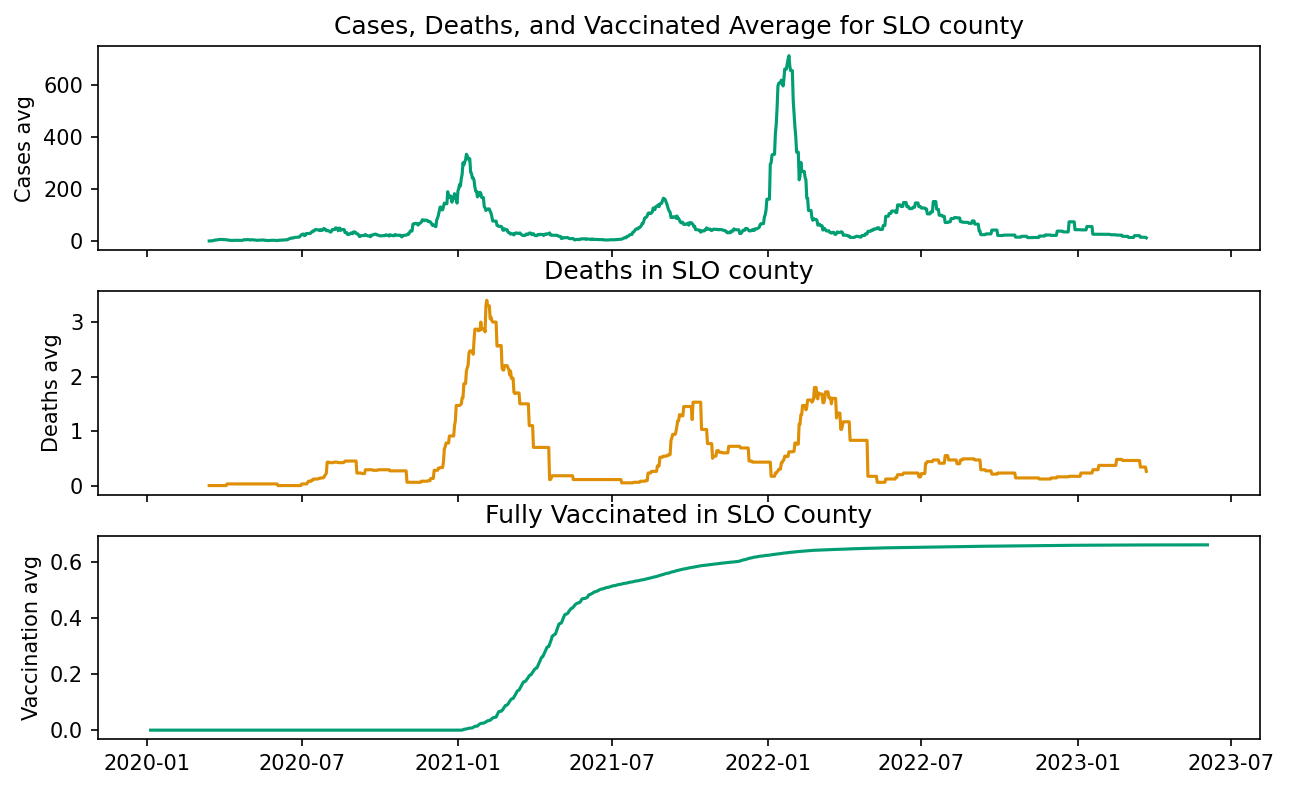

In [ ]:
#plotting the vax data for SLO county
fig , subs = plt.subplots (3, 1, figsize= (10,6),  dpi =150, sharex = True)

subs[0].plot(slo_data['date'], slo_data['cases_avg'], color=colors[2], label='San Luis Obispo')

subs[1].plot(slo_data['date'], slo_data['deaths_avg'], color=colors[1], label='San Luis Obispo')
subs[2].plot(slo_vax['date'], slo_vax['fully_vaccinated_percent'], color=colors[2], label='San Luis Obispo vaxxed')
subs[0].set_ylabel('Cases avg')
subs[1].set_ylabel('Deaths avg')
subs[2].set_ylabel('Vaccination avg')
subs[0].set_title('Cases, Deaths, and Vaccinated Average for SLO county')
subs[1].set_title('Deaths in SLO county')
subs[2].set_title('Fully Vaccinated in SLO County')
sub.legend(frameon=False)


##**Part 2**

## 2) Part 2: Exploring the data more!
You may choose what to explore about the data in part 2. At some point during this process, make sure you are **asking a question** and trying to answer it with the data. Can you find out something interesting? Here are some suggestions:
#### Relatively easy ideas:
* Make a similar county plot as you made in 1C, but include another 2-3 counties near your county so you can compare and contrast the dynamics of cases, deaths, and vaccinations. Since you are comparing counties with different population sizes on the same plot, you should use cases_avg_per_100k and deaths_avg_per_100k instead of just cases_avg and deaths_avg, in order to control for those population size differences.
* Measure R at a few time intervals for your county. Compare and contrast your results with your results for New York and California above. Make sure to check that your data for the time intervals isn’t too noisy – it’s possible for little fluctuations to affect the slope of log_deaths vs. time if the counts are low.
* Do some research to add some human aspect to the story of Covid-19 in your county, and annotate your plot (either in pyplot or on another image editing program). One example of an annotation you could add is when lockdowns or mask mandates began or ended, but you could also mark more specific events, like specific people who are important to the community or to you getting sick or vaccinated.
#### More difficult ideas:
* Look at the the relationship between politics (voting results from the 2020 election), vaccination rates, and covid deaths since the start of the summer. You can ask this question specifically at the county level in California, using the `county_vax` dataframe, the `county_data` dataframe, and the county voting data available here: `'https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv'`. This will likely require you to:
    * Filter the `county_vax` dataframe to just get data from a single date (one row per county)
    * Filter the `county_data` dataframe to get dates starting around June 2021, and then use `.groupby` and `.sum` to get the total number of deaths and cases per 100k in that time frame for each county
    * Manipulate the FIPS or county_name columns in each of the 3 datasets to be able to merge them
* Pick a country whose data you would like to explore, or ask a question about why some countries have done better than others (see the Our World in Data dataset below). Keep in mind that different countries have different standards for reporting cases and deaths, so the data quality may be variable.
* Look into the variant data from the LA Times dataset and see if you can measure differences in R between variants in certain time intervals when multiple variants were present in California
* Look into the prison data in either the LA Times or NY Times datasets - how did Covid-19 affect prison populations as compared to the general public?
* Look at the mask use survey data from the NY Times from the summer of 2020. Does these mask use survey results correlate with voting patterns in US counties? With vaccination rates? With Covid cases or deaths? Similar to the question above, this will likely require some data manipulation and merging

* Or you can come up with your own idea!

Dataset links:

* [LA Times covid data](https://github.com/datadesk/california-coronavirus-data)
* [New York Times covid data](https://github.com/nytimes/covid-19-data)
* [Our world in data (covid data)](https://github.com/owid/covid-19-data)
* [Our world in data (general worldwide datasets)](https://github.com/owid/owid-datasets/tree/master/datasets)
* [Datasets from dataopian](https://github.com/datasets)

In [ ]:
#make a county plot
#import county voting data
county_voting = pd.read_csv('https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv')
county_voting.head(3)

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631


In [ ]:
#renaming the column for merging purposes
county_voting= county_voting.rename(columns = {"state_name":"state"})
county_voting.head(3)

,state,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631


In [ ]:
#grouping county voting data by state
'''
since county voting data needs "county"
at the end of each input, it's very hard
to merge into a list for voting purposes.
We are going to base the voting data on states.
'''
state_voting = county_voting[['state','votes_gop','votes_dem','total_votes']].groupby(['state']).sum()#sum adds all of the votes together
#filtering by state, republican votes, democratic votes, and total votes for each state by using sum method
state_voting["per_gop"]=state_voting['votes_gop']/state_voting['total_votes'] #in order to get percentage of republican votes for graph
state_voting["per_dem"]=state_voting['votes_dem']/state_voting['total_votes']#do the same for democratic votes

In [ ]:
#groupig covid data by state and summing deaths by state and date
sum_state_data=state_data[['state','deaths','deaths_avg','deaths_avg_per_100k']].groupby(['state']).sum()
sum_state_data

,deaths,deaths_avg,deaths_avg_per_100k
state,,,
Alabama,21631,21011.53,428.54
Alaska,1438,1616.30,221.43
American Samoa,34,55.04,111.79
Arizona,33190,34090.15,468.62
Arkansas,13068,12842.05,425.62
California,104277,101425.61,256.67
Colorado,14245,14340.71,248.52
Connecticut,12270,12526.29,351.39
Delaware,3352,3088.44,317.00


In [ ]:
#merging, adding these variables to one complete dataset
merged_data=state_voting.merge(sum_state_data, on= 'state')
merged_data

,votes_gop,votes_dem,total_votes,per_gop,per_dem,deaths,deaths_avg,deaths_avg_per_100k
state,,,,,,,,
Alabama,1441168,849648,2323304,0.620310,0.365707,21631,21011.53,428.54
Alaska,189892,153405,391346,0.485228,0.391993,1438,1616.30,221.43
Arizona,1661686,1672143,3387326,0.490560,0.493647,33190,34090.15,468.62
Arkansas,760647,423932,1219069,0.623957,0.347751,13068,12842.05,425.62
California,6005961,11109764,17495906,0.343278,0.634992,104277,101425.61,256.67
Colorado,1364607,1804352,3256953,0.418983,0.554000,14245,14340.71,248.52
Connecticut,715291,1080680,1824280,0.392095,0.592387,12270,12526.29,351.39
Delaware,200603,296268,504010,0.398014,0.587822,3352,3088.44,317.00
District of Columbia,18586,317323,344356,0.053973,0.921497,1432,1480.14,209.36


In [ ]:
#dropping outlier (DC) to make the data not seem skewed due to it's presense
no_outlier = merged_data.drop('District of Columbia')
no_outlier

,votes_gop,votes_dem,total_votes,per_gop,per_dem,deaths,deaths_avg,deaths_avg_per_100k
state,,,,,,,,
Alabama,1441168,849648,2323304,0.620310,0.365707,21631,21011.53,428.54
Alaska,189892,153405,391346,0.485228,0.391993,1438,1616.30,221.43
Arizona,1661686,1672143,3387326,0.490560,0.493647,33190,34090.15,468.62
Arkansas,760647,423932,1219069,0.623957,0.347751,13068,12842.05,425.62
California,6005961,11109764,17495906,0.343278,0.634992,104277,101425.61,256.67
Colorado,1364607,1804352,3256953,0.418983,0.554000,14245,14340.71,248.52
Connecticut,715291,1080680,1824280,0.392095,0.592387,12270,12526.29,351.39
Delaware,200603,296268,504010,0.398014,0.587822,3352,3088.44,317.00
Florida,5668731,5297045,11067456,0.512198,0.478615,87141,87614.51,407.65


Include at least one figure that shows data relevant to the question.

Briefly explain your results
  * You may not have been able to answer your question with the data - that is OK
  * Briefly explain what the data says about your question.
  * Remember, correlation does not equal causation, but together with other data / information, we can say what the data "suggests" at least! Rule of thumb: be honest, ask yourself what do you think is happening in the data, and report any statistical test results openly.

Text(0, 0.5, 'Avg # of Deaths (per 100k)')

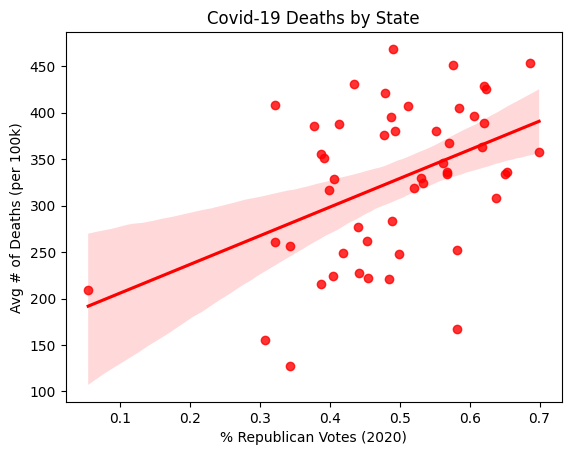

In [ ]:
#plot needed data on graph for Republican party votes
sns.regplot(x=merged_data['per_gop'], y=merged_data['deaths_avg_per_100k'],color='red')#plots a regression line using cborn
plt.title("Covid-19 Deaths by State")
plt.xlabel("% Republican Votes (2020)")
plt.ylabel("Avg # of Deaths (per 100k)")

Text(0, 0.5, 'Avg # of Deaths (per 100k)')

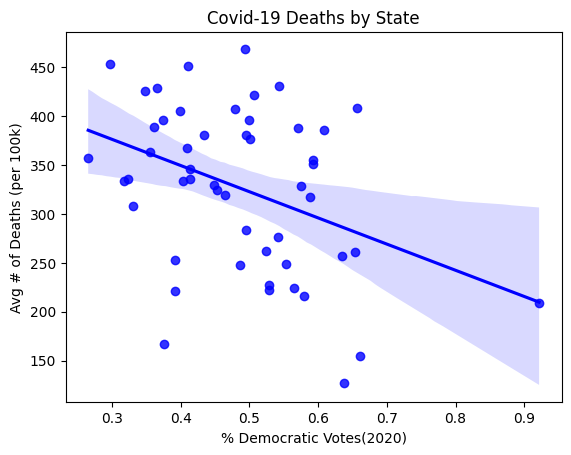

In [ ]:
#plotting Democratic votes
sns.regplot(x=merged_data['per_dem'],y=merged_data['deaths_avg_per_100k'],color='blue')
plt.title("Covid-19 Deaths by State")
plt.xlabel("% Democratic Votes(2020)")
plt.ylabel("Avg # of Deaths (per 100k)")

Text(0, 0.5, 'Avg # of Deaths (per 100k)')

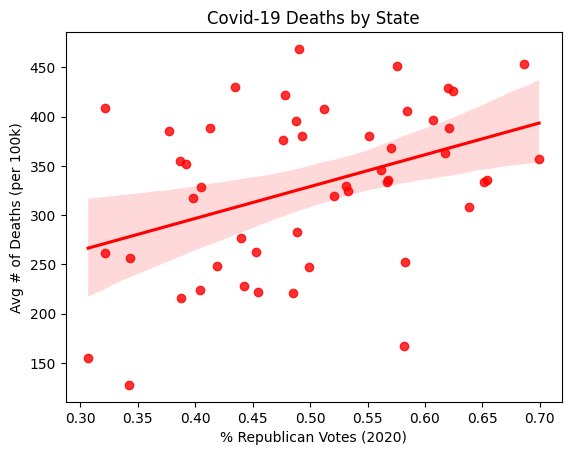

In [ ]:
#don't want outlier on Republican graph
sns.regplot(x=no_outlier['per_gop'],y=no_outlier['deaths_avg_per_100k'],color='red')
plt.title("Covid-19 Deaths by State")
plt.xlabel("% Republican Votes (2020)")
plt.ylabel("Avg # of Deaths (per 100k)")

Text(0, 0.5, 'Avg # of Deaths (per 100k)')

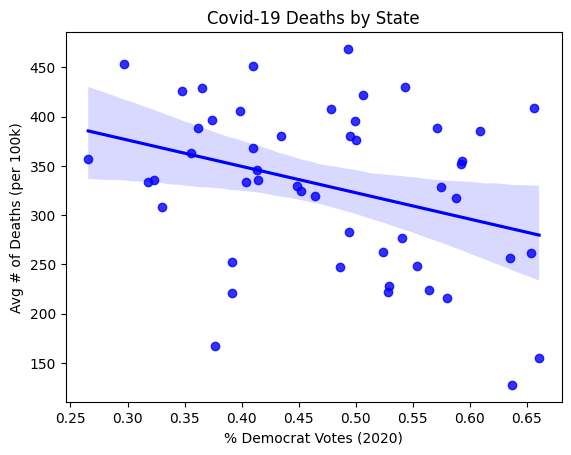

In [ ]:
#have to account for the outlier on the democratic graph
sns.regplot(x=no_outlier['per_dem'], y=no_outlier['deaths_avg_per_100k'],color = 'blue')
plt.title("Covid-19 Deaths by State")
plt.xlabel("% Democrat Votes (2020)")
plt.ylabel("Avg # of Deaths (per 100k)")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fd6e2914-bf06-44d9-8520-39d43341e145' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>